In [124]:
from keras.utils import image_dataset_from_directory, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers.experimental.preprocessing import Rescaling

import matplotlib.pyplot as plt

Константы

In [125]:
IMAGE_SIZE = (64, 64)

In [126]:
train_path = '../dataset/chest_xray/train'
val_path = '../dataset/chest_xray/val'
test_path = '../dataset/chest_xray/test'

In [127]:
train, train_val = image_dataset_from_directory(train_path, image_size=IMAGE_SIZE, subset="both", validation_split=0.2, seed=11)
test = image_dataset_from_directory(test_path, image_size=IMAGE_SIZE)
val_dataset = image_dataset_from_directory(val_path, image_size=IMAGE_SIZE)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Using 1043 files for validation.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


Нормализация датасета

In [128]:
rescale = Rescaling(scale=1.0 / 255)

train = train.map(lambda image, label: (rescale(image), label))
train_val = train_val.map(lambda image, label: (rescale(image), label))
val_dataset  = val_dataset.map(lambda image, label: (rescale(image), label))
test  = test.map(lambda image, label: (rescale(image), label))

Создание модели

In [129]:
# let's build the CNN model

model = Sequential([
    Conv2D(32, (3,3), activation='relu', # (3,3) - фильтр
                        input_shape=(64,64,3)),
    MaxPooling2D((2,2)), # фильтр (2,2) для пулинга
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),

    Flatten(),
    Dense(64, 'relu'),
    Dense(1, 'softmax')
])

Компиляция модели

In [130]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:
hist = model.fit(train, validation_data=(train_val), epochs=5, batch_size=64)

Epoch 1/5
131/131 [==============================] - 42s 297ms/step - loss: 0.0000e+00 - accuracy: 0.7426 - val_loss: 0.0000e+00 - val_accuracy: 0.7440
Epoch 2/5
131/131 [==============================] - 39s 293ms/step - loss: 0.0000e+00 - accuracy: 0.7426 - val_loss: 0.0000e+00 - val_accuracy: 0.7440
Epoch 3/5
131/131 [==============================] - 40s 297ms/step - loss: 0.0000e+00 - accuracy: 0.7426 - val_loss: 0.0000e+00 - val_accuracy: 0.7440
Epoch 4/5
131/131 [==============================] - 40s 294ms/step - loss: 0.0000e+00 - accuracy: 0.7426 - val_loss: 0.0000e+00 - val_accuracy: 0.7440
Epoch 5/5
131/131 [==============================] - 40s 296ms/step - loss: 0.0000e+00 - accuracy: 0.7426 - val_loss: 0.0000e+00 - val_accuracy: 0.7440


In [132]:
train_acc = max(hist.history['accuracy'])
test_loss, test_acc = model.evaluate(test)

20/20 [==============================] - 3s 105ms/step - loss: 0.0000e+00 - accuracy: 0.6250


In [133]:
def score_plot():
    plt.bar(['train', 'test'], [train_acc, test_acc], color=['#069AF3', 'orange'])
    plt.title(f'Score')
    plt.show()

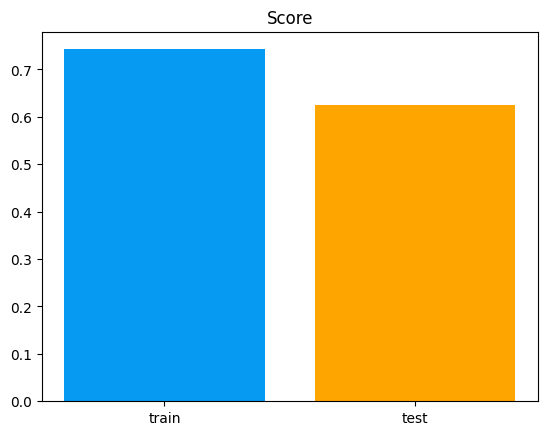

In [134]:
score_plot()

Сохранение модели

In [138]:
test_score = int(round(test_acc * 100, 0))

model.save(f"../models/cnn{test_score}.h5")